<a href="https://colab.research.google.com/github/Mayukhgits/Porosity-Permeability-Study/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import lasio

In [3]:
df = pd.read_csv('/content/poroperm data.csv.csv')
df

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,3999.05,3998.85,7,724,4980.00,4850.000,NaN,NaN,28.9,NaN,NaN,NaN,2.65,NaN
724,3999.20,3999.00,7,725,3460.00,3350.000,NaN,NaN,20.7,NaN,NaN,NaN,2.66,NaN
725,3999.45,3999.25,7,726,3600.00,3490.000,NaN,NaN,20.9,NaN,NaN,NaN,2.64,NaN
726,3999.70,3999.50,7,727,180.00,163.000,479.00,448.00,17.3,NaN,NaN,NaN,2.64,NaN


##Creating the Figure With Subplots

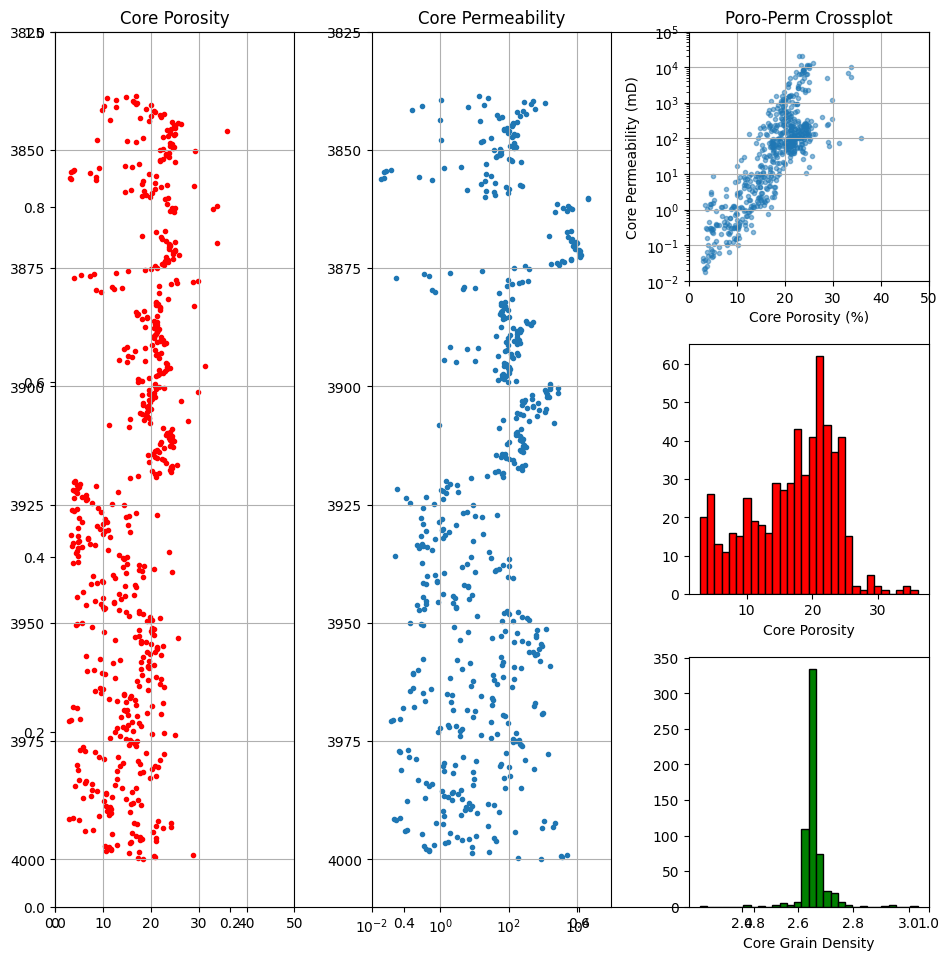

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2), rowspan=1)
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2), rowspan=1)
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2), rowspan=1)

ax1.scatter(df['CPOR'], df['DEPTH'], marker='.', c='red')
ax1.set_xlim(0, 50)
ax1.set_ylim(4010, 3825)
ax1.set_title('Core Porosity')
ax1.grid()

ax2.scatter(df['CKHG'], df['DEPTH'], marker='.')
ax2.set_xlim(0.01, 100000)
ax2.set_ylim(4010, 3825)
ax2.semilogx()
ax2.set_title('Core Permeability')
ax2.grid()

ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_ylim(0.01, 100000)
ax3.set_xlim(0, 50)
ax3.set_title('Poro-Perm Crossplot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (mD)')
ax3.grid()

ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red')
ax4.set_xlabel('Core Porosity')


ax5.hist(df['CGD'], bins=30, edgecolor='black', color='green')
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.show()

In [12]:
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 376.4 kB/s eta 0:00:00


In [19]:
cpi = lasio.read('/content/15_9-19_A_CPI.las').df()
cpi['PHIF']=cpi['PHIF']*100
cpi.columns

Index(['BS', 'BVW', 'CARB_FLAG', 'COAL_FLAG', 'DELTA', 'GRMAX', 'GRMIN', 'J',
       'KLHC_INT', 'KLOGH', 'M', 'N', 'PERF_FLAG', 'PHIF', 'PORD', 'RHOFL',
       'RHOMA', 'RW', 'SAND_FLAG', 'SW', 'SWIRR', 'TEMP', 'VSH'],
      dtype='object')

##Adding Interpreted Data as Line Plots

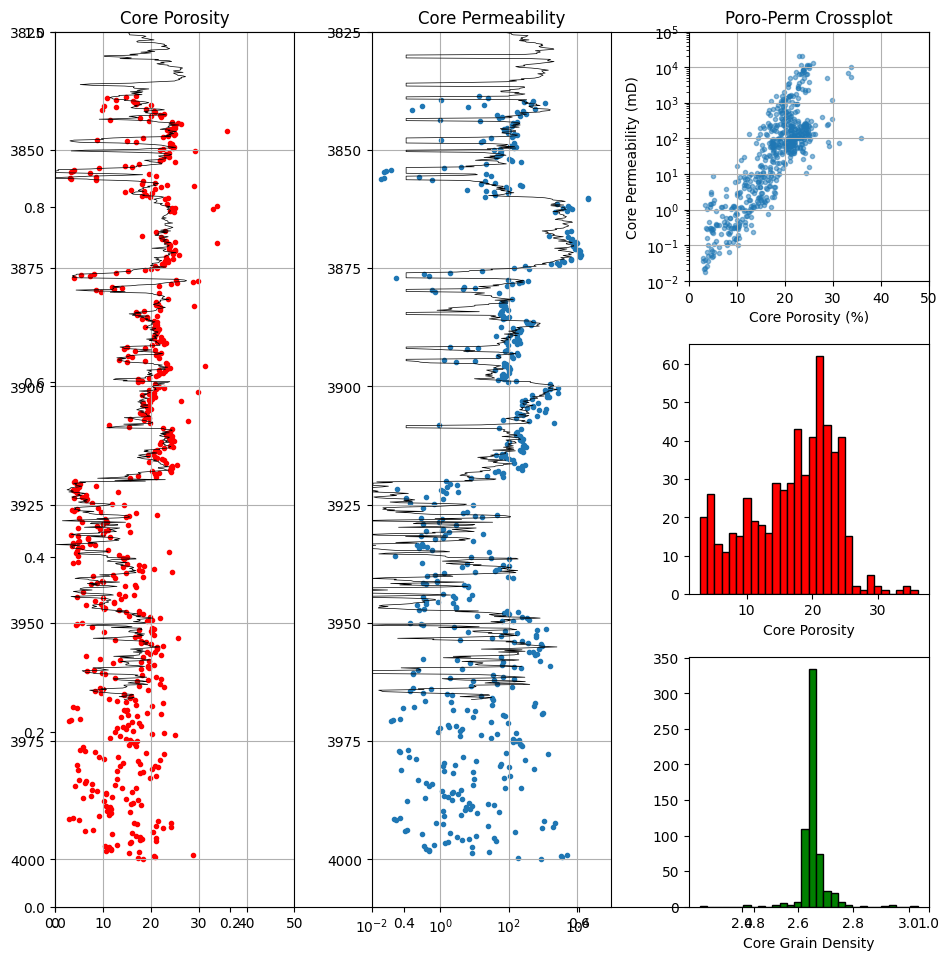

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2), rowspan=1)
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2), rowspan=1)
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2), rowspan=1)

ax1.scatter(df['CPOR'], df['DEPTH'], marker='.', c='red')
ax1.plot(cpi['PHIF'], cpi.index, c='black', lw=0.5)
ax1.set_xlim(0, 50)
ax1.set_ylim(4010, 3825)
ax1.set_title('Core Porosity')
ax1.grid()

ax2.scatter(df['CKHG'], df['DEPTH'], marker='.')
ax2.plot(cpi['KLOGH'], cpi.index, c='black', lw=0.5)
ax2.set_xlim(0.01, 100000)
ax2.set_ylim(4010, 3825)
ax2.semilogx()
ax2.set_title('Core Permeability')
ax2.grid()

ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.semilogy()
ax3.set_ylim(0.01, 100000)
ax3.set_xlim(0, 50)
ax3.set_title('Poro-Perm Crossplot')
ax3.set_xlabel('Core Porosity (%)')
ax3.set_ylabel('Core Permeability (mD)')
ax3.grid()

ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red')
ax4.set_xlabel('Core Porosity')

ax5.hist(df['CGD'], bins=30, edgecolor='black', color='green')
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.show()